List of exercises 5 (2nd course assessment)

In [ ]:
# Modules...
import numpy as np              # numeric
import matplotlib.pyplot as plt # plotting
import pywt                     # wavelets

# inline plots
%matplotlib inline

# filtering, Hilbert transform and correlation functions
from scipy.signal import butter,filtfilt,hilbert,correlate

# coherence and smoothing functions
from scipy.signal import coherence,savgol_filter

# Loading Matlab data
from scipy.io import loadmat

Loading data:

In [ ]:
data = loadmat('GC_LFPs.mat')
LFP = data['LFP']
np.shape(LFP)

(144, 3500)

Time vector:

In [ ]:
srate = 1000. # sampling rate (Hz)
t = np.arange(len(LFP[0]))/srate # time vector

Question 1

([<matplotlib.axis.XTick at 0x7fe7f89b4890>,
 <a list of 8 Text xticklabel objects>)

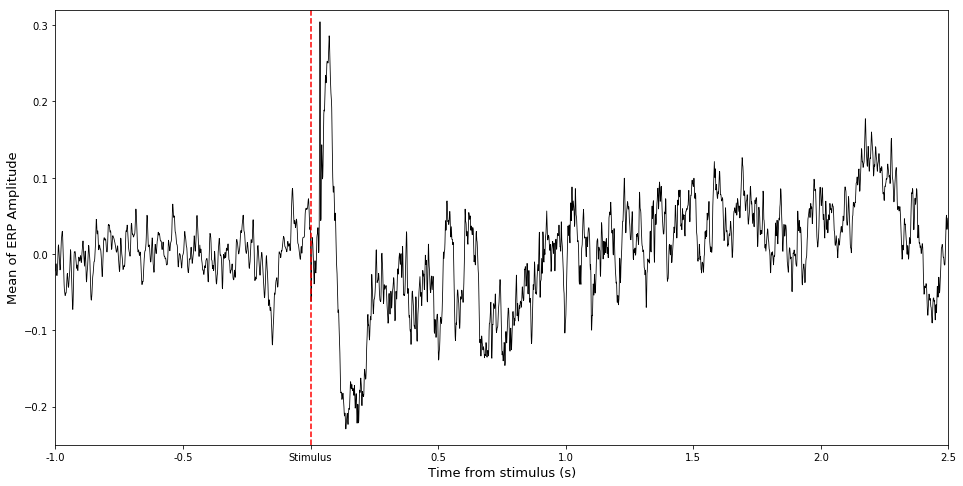

In [ ]:
ERP = np.mean(LFP,axis=0) # mean ERP
plt.figure(figsize=(16,8))
plt.plot(t-1,ERP,'k',linewidth=0.8)
plt.plot([0,0],[-.25,.32],'r--')
plt.xlim(-1,2.5)
plt.ylim(-.25,.32)
plt.xlabel('Time from stimulus (s)',size=13)
plt.ylabel('Mean of ERP Amplitude',size=13);
plt.xticks(np.arange(-1,3,0.5), ['-1.0','-0.5', 'Stimulus', '0.5', '1.0', '1.5', '2.0', '2.5'])

Question 2

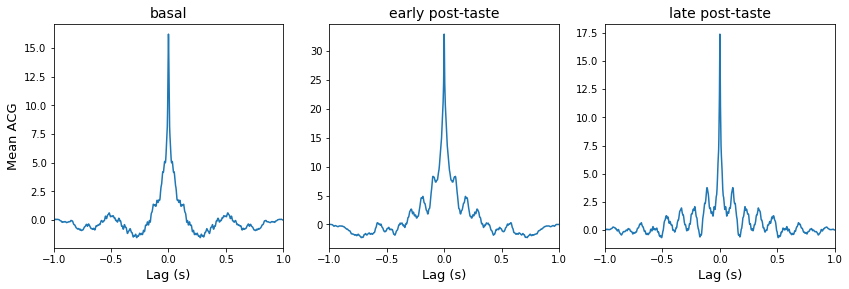

In [ ]:
ACG_basal = []
ACG_early = []
ACG_post  = []

for trial in range(len(LFP)):
    ACG_basal.append(correlate(LFP[trial,:1000],LFP[trial,:1000]))
    ACG_early.append(correlate(LFP[trial,1000:2000],LFP[trial,1000:2000]))
    ACG_post.append(correlate(LFP[trial,2000:3000],LFP[trial,2000:3000]))

ACG_basalM = np.mean(np.array(ACG_basal),axis=0)
ACG_earlyM = np.mean(np.array(ACG_early),axis=0)
ACG_postM  = np.mean(np.array(ACG_post),axis=0)

plt.figure(figsize=(14,14))
plt.subplot(331)
plt.plot(np.arange(-len(LFP[0,:1000])+1,len(LFP[0,:1000]))/srate,ACG_basalM)
plt.title('basal',size=14)
plt.ylabel('Mean ACG',size=13)
plt.xlim(-1,1)
plt.xlabel('Lag (s)',size=13);
plt.subplot(332)
plt.plot(np.arange(-len(LFP[0,1000:2000])+1,len(LFP[0,1000:2000]))/srate,ACG_earlyM)
plt.title('early post-taste',size=14)
plt.xlim(-1,1)
plt.xlabel('Lag (s)',size=13);
plt.subplot(333)
plt.plot(np.arange(-len(LFP[0,2000:3000])+1,len(LFP[0,2000:3000]))/srate,ACG_postM)
plt.title('late post-taste',size=14)
plt.xlim(-1,1)
plt.xlabel('Lag (s)',size=13);

Questions 3 & 4

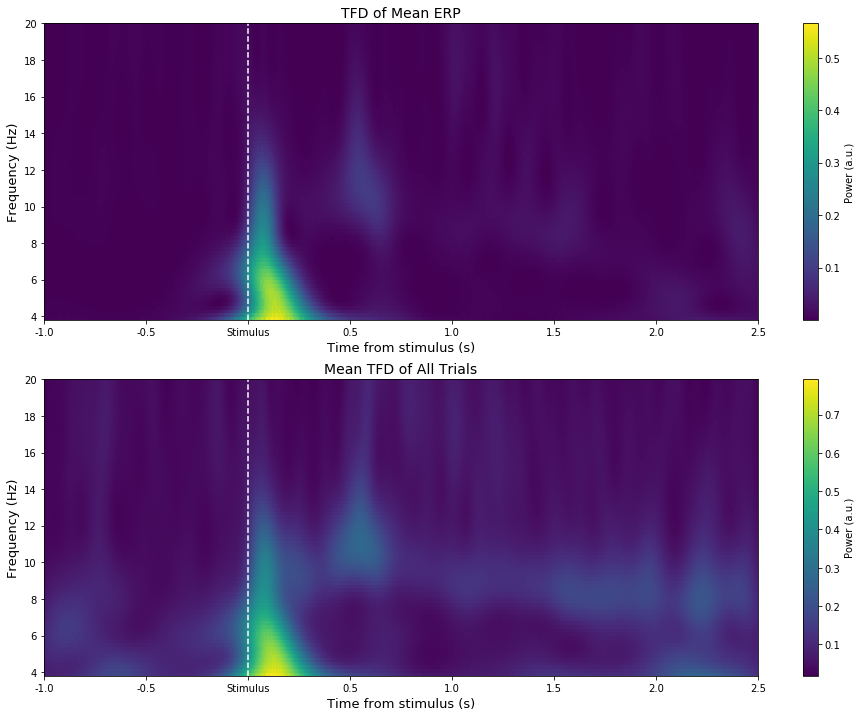

In [ ]:
freqs = np.arange(3.8,20.1,0.2)

motherwave = 'cmor1-1'
scale = pywt.central_frequency(motherwave)/(freqs/srate)
WaveletTransform,freqs = pywt.cwt(ERP,scale,motherwave,1./srate)
TFD1 = abs(WaveletTransform)**2

TFD2 = np.zeros((len(freqs),len(t)))

for trial in range(len(LFP)):
    WaveletTransform,freqs = pywt.cwt(LFP[trial],scale,motherwave,1./srate)
    TFD2 += abs(WaveletTransform)**2

TFD2 = TFD2/len(LFP)

plt.figure(figsize=(16,12))

plt.subplot(2,1,1)
plt.pcolormesh(t-1,freqs,TFD1)
plt.plot([0,0],[3.8,20],'w--')
plt.title('TFD of Mean ERP',size=14)
plt.xlabel('Time from stimulus (s)',size=13)
plt.ylabel('Frequency (Hz)',size=13)
plt.xticks(np.arange(-1,3,0.5), ['-1.0','-0.5', 'Stimulus', '0.5', '1.0', '1.5', '2.0', '2.5'])
plt.colorbar(label='Power (a.u.)')

plt.subplot(2,1,2)
plt.pcolormesh(t-1,freqs,TFD2)
plt.plot([0,0],[3.8,20],'w--')
plt.title('Mean TFD of All Trials',size=14)
plt.xlabel('Time from stimulus (s)',size=13)
plt.ylabel('Frequency (Hz)',size=13)
plt.xticks(np.arange(-1,3,0.5), ['-1.0','-0.5', 'Stimulus', '0.5', '1.0', '1.5', '2.0', '2.5'])
plt.colorbar(label='Power (a.u.)');

Question 5

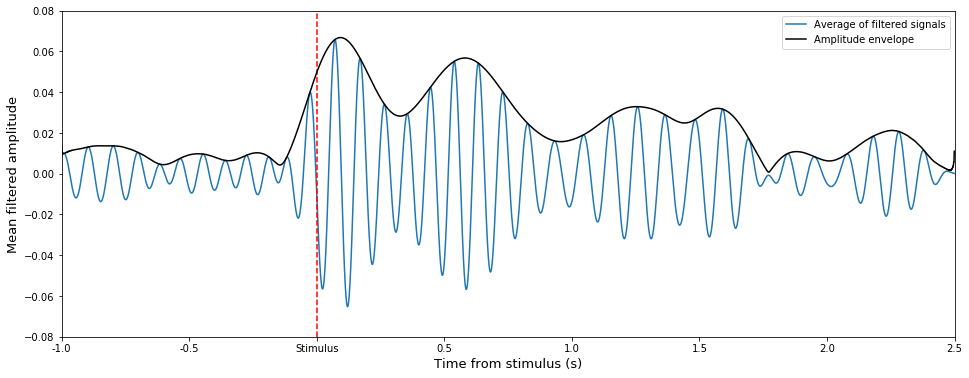

In [ ]:
order = 3
nyq = 0.5*srate
lowcut = 8./nyq
highcut = 12./nyq
b,a = butter(order,[lowcut,highcut],'bandpass')

FiltLFP = []
for trial in range(len(LFP)):
    FiltLFP.append(filtfilt(b,a,LFP[trial]))

MeanFiltLFP = np.mean(np.array(FiltLFP),axis=0)

plt.figure(figsize=(16,6))
plt.plot(t-1,MeanFiltLFP,label='Average of filtered signals')
plt.plot([0,0],[-.08,.08],'r--')
plt.xlim(-1,2.5)
plt.ylim(-.08,.08)

LFP_analitico = hilbert(MeanFiltLFP)
EnvAmp = abs(LFP_analitico)
plt.plot(t-1,EnvAmp,'k',label='Amplitude envelope')
plt.ylabel('Mean filtered amplitude', size=13)
plt.xlabel('Time from stimulus (s)',size=13)
plt.xticks(np.arange(-1,3,0.5), ['-1.0','-0.5', 'Stimulus', '0.5', '1.0', '1.5', '2.0', '2.5'])

plt.legend();

Question 6 + bonus

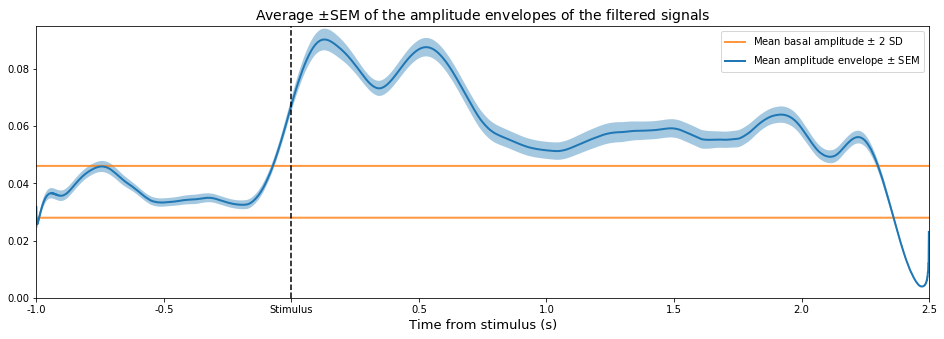

In [ ]:
EnvAmpl = []
for trial in range(len(LFP)):
    FiltLFP = filtfilt(b,a,LFP[trial])
    EnvAmpl.append(abs(hilbert(FiltLFP)))

Mean_EnvAmp = np.mean(np.array(EnvAmpl),axis=0)
SEM_EnvAmp = np.std(np.array(EnvAmpl),axis=0)/np.sqrt(len(LFP))
Mean_Basal = np.mean(Mean_EnvAmp[200:800])
SD_Basal = np.std(Mean_EnvAmp[200:800])

plt.figure(figsize=(16,5))
#plt.plot(t-1,np.ones(len(t))*Mean_Basal,linewidth=2,color='C1')
# plt.fill_between(t-1,Mean_Basal-2*SD_Basal,Mean_Basal+2*SD_Basal,alpha=0.4,color='C1')
plt.plot(t-1,np.ones(len(t))*(Mean_Basal-2*SD_Basal),linewidth=2,alpha=0.8,color='C1',label='Mean basal amplitude $\pm$ 2 SD')
plt.plot(t-1,np.ones(len(t))*(Mean_Basal+2*SD_Basal),linewidth=2,alpha=0.8,color='C1')
plt.plot(t-1,Mean_EnvAmp,linewidth=2,label='Mean amplitude envelope $\pm$ SEM')
plt.fill_between(t-1,Mean_EnvAmp-SEM_EnvAmp,Mean_EnvAmp+SEM_EnvAmp,alpha=0.4)
plt.plot([0,0],[0,.095],'k--')
plt.xlim(-1,2.5)
plt.ylim(0,.095)
plt.legend()
plt.xlabel('Time from stimulus (s)',size=13)
plt.xticks(np.arange(-1,3,0.5), ['-1.0','-0.5', 'Stimulus', '0.5', '1.0', '1.5', '2.0', '2.5'])
plt.title('Average $\pm$SEM of the amplitude envelopes of the filtered signals',size=14);

Question 7

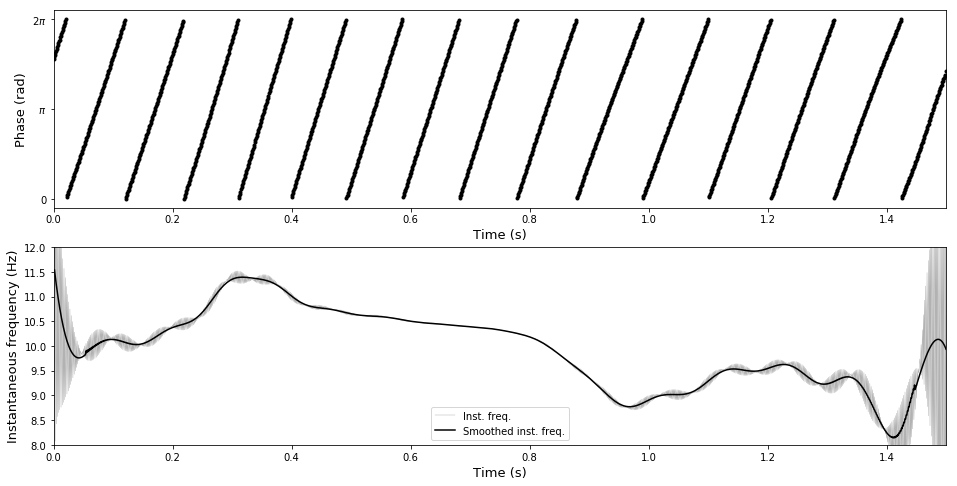

In [ ]:
Phase = np.angle(hilbert(MeanFiltLFP[1000:2500]))+np.pi
PhaseUnwrapped = np.unwrap(Phase)
InstFreq = np.diff(PhaseUnwrapped)/(2*np.pi/srate)
InstFreq_smoothed = savgol_filter(InstFreq,105,3)
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.plot(t[1000:2500]-1,Phase,'k.')
plt.xlim(0,1.5)
plt.xlabel('Time (s)',size=13)
plt.ylabel('Phase (rad)',size=13)
plt.yticks([0,np.pi,2*np.pi],[0,'$\pi$','2$\pi$'])
plt.subplot(212)
plt.plot((t[1001:2500]-1)+1/(2*srate),InstFreq,'grey',linewidth=0.3,label='Inst. freq.')
plt.plot((t[1001:2500]-1)+1/(2*srate),InstFreq_smoothed,'k',label='Smoothed inst. freq.')
plt.xlim(0,1.5)
plt.ylim(8,12)
plt.xlabel('Time (s)',size=13)
plt.ylabel('Instantaneous frequency (Hz)',size=13)
plt.legend();

Question 8

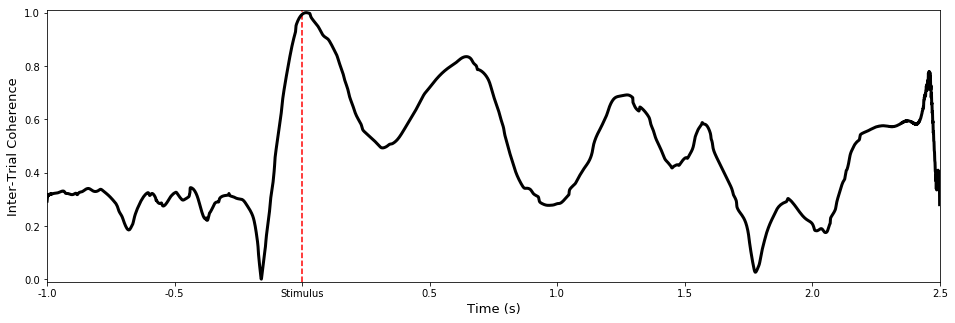

In [ ]:
PhaseAll = np.empty((len(LFP),len(t)))
for trial in range(len(LFP)):
    FiltLFP = filtfilt(b,a,LFP[trial])
    Phase = np.angle(hilbert(FiltLFP))#
    PhaseAll[trial] = Phase

ITC = abs(np.mean(np.exp(1j*PhaseAll),axis=0))
NormalizedITC = (ITC-min(ITC))/(max(ITC)-min(ITC))

plt.figure(figsize=(16,5))
plt.plot([0,0],[-0.01,1.01],'r--')
plt.plot(t-1,NormalizedITC,'k',linewidth=3)
plt.xlim(-1,2.5)
plt.ylim(-0.01,1.01)
plt.xlabel('Time (s)',size=13)
plt.xticks(np.arange(-1,3,0.5), ['-1.0','-0.5', 'Stimulus', '0.5', '1.0', '1.5', '2.0', '2.5'])
plt.ylabel('Inter-Trial Coherence',size=13);